In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Using inspect to see the column names and column type
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [42]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date[0]

'2017-08-23'

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.datetime.strptime(latest_date[0], "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
past_year = latest_date.replace(year=latest_date.year-1)

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date > past_year).all()


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

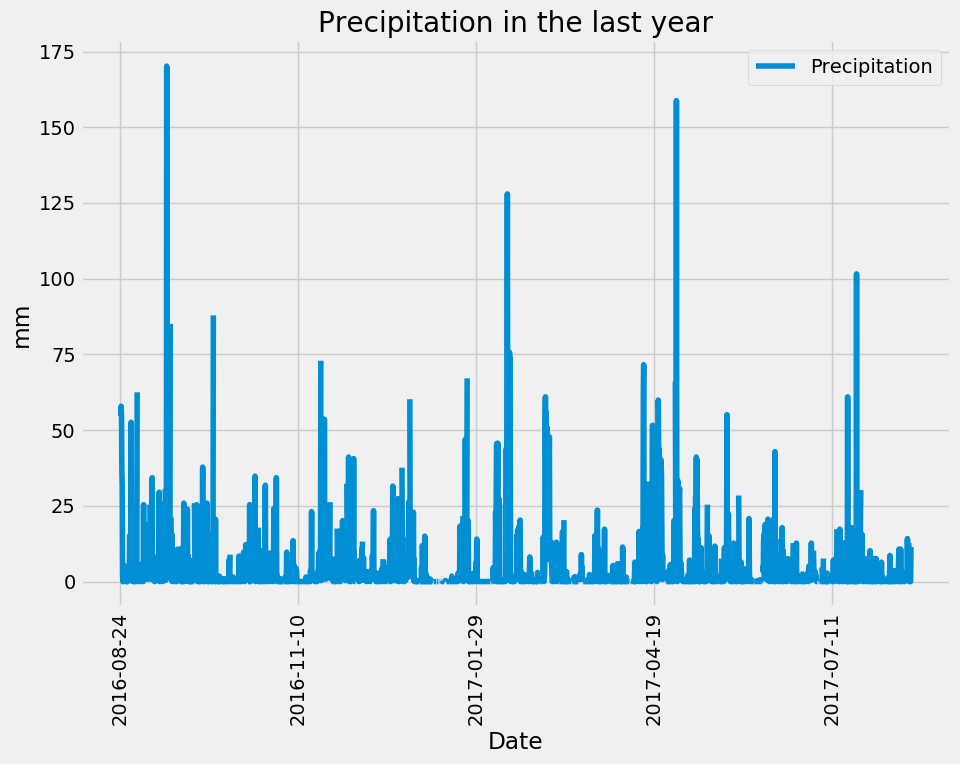

In [98]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp, columns = ["Date", "Precipitation"]).set_index("Date")

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot(figsize=(10,7))
plt.title("Precipitation in the last year")
plt.ylabel("mm")
plt.xticks(rotation="vertical")

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [68]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stn = session.query(measurement.station, func.count(measurement.id)).group_by(measurement.station).\
                order_by(func.count(measurement.id).desc()).all()

most_active_stn

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281')[0][0]

highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281')[0][0]

avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281')[0][0]

print(f"The lowest temperature is {lowest_temp}\nThe highest temperature is {highest_temp}\nThe average temperature is {avg_temp}")


The lowest temperature is 12.2
The highest temperature is 29.4
The average temperature is 22.03582251082252


Text(0.5, 0, 'Temperature')

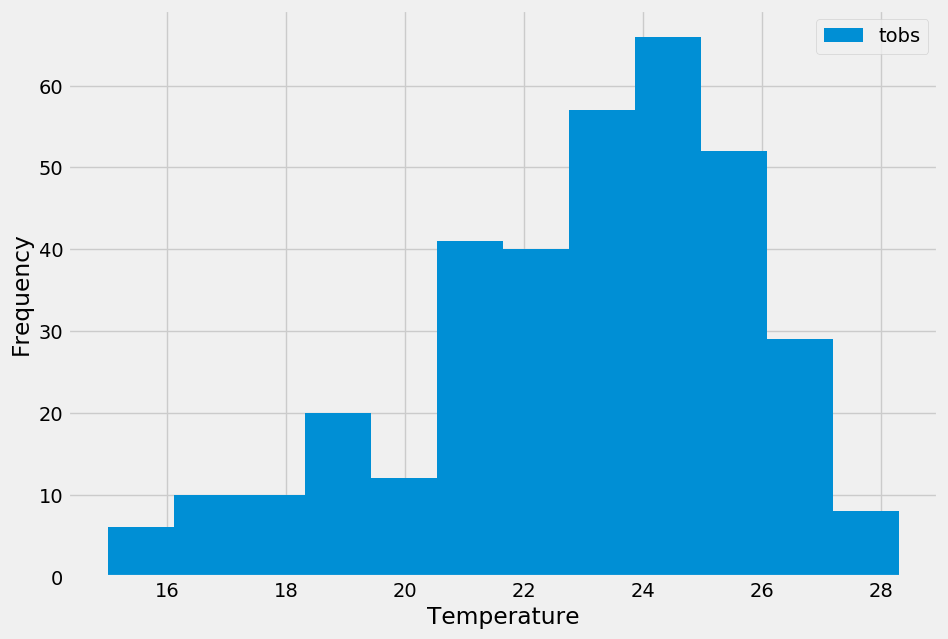

In [100]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
past_year_tobs = session.query(measurement.tobs).filter(measurement.date > past_year).\
                filter(measurement.station == 'USC00519281')

tobs_df = pd.DataFrame(past_year_tobs, columns=['tobs'])
tobs_df.plot.hist(bins=12, figsize=(10,7))
plt.xlabel("Temperature")

# Close session

In [18]:
# Close Session
session.close()